In [91]:
import numpy as np
import matplotlib.pyplot as plt
import hypernetx as hx
import halp
from halp.directed_hypergraph import DirectedHypergraph

from halp.algorithms.directed_paths import shortest_b_tree
import networkx as nx
import math

In [151]:
# Define directed hypergraph from overleaf example
H = DirectedHypergraph()
H.add_hyperedge([1], [2, 3]) #, label="E1")
H.add_hyperedge([2], [4, 5]) #, label="E2")
H.add_hyperedge([2,3], [6, 7]) #, label="E3")
H.add_hyperedge([5, 6], [10]) #, label="E4")
H.add_hyperedge([8, 9, 10], [4]) #, label="E5")
H.add_hyperedge([11], [12]) #, label="E6")
H.add_hyperedge([12, 13], [11]) #, label="E7")

'e7'

In [174]:
id_source_vertex = 13
mapping, weight_dict = shortest_b_tree(H, id_source_vertex)

In [175]:
mapping

{1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None}

In [82]:
weight_tuples = [(vertex_id, weight_dict[vertex_id]) for vertex_id in weight_dict.keys()]
weight_tuples.sort(key=lambda x: x[1])

In [115]:
tree = nx.Graph()

In [116]:
for (vertex_id, weight) in weight_tuples:
    if math.isinf(weight):
        break

    hyperedge_id = mapping[vertex_id]
    if hyperedge_id is None:
        continue

    tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)

    weight_tail_nodes = [weight_dict[vertex_id] for vertex_id in tail_vertex_id_list]

    node_id_maximal_weight = tail_vertex_id_list[weight_tail_nodes.index(max(weight_tail_nodes))]

    tree.add_edge(node_id_maximal_weight, vertex_id)

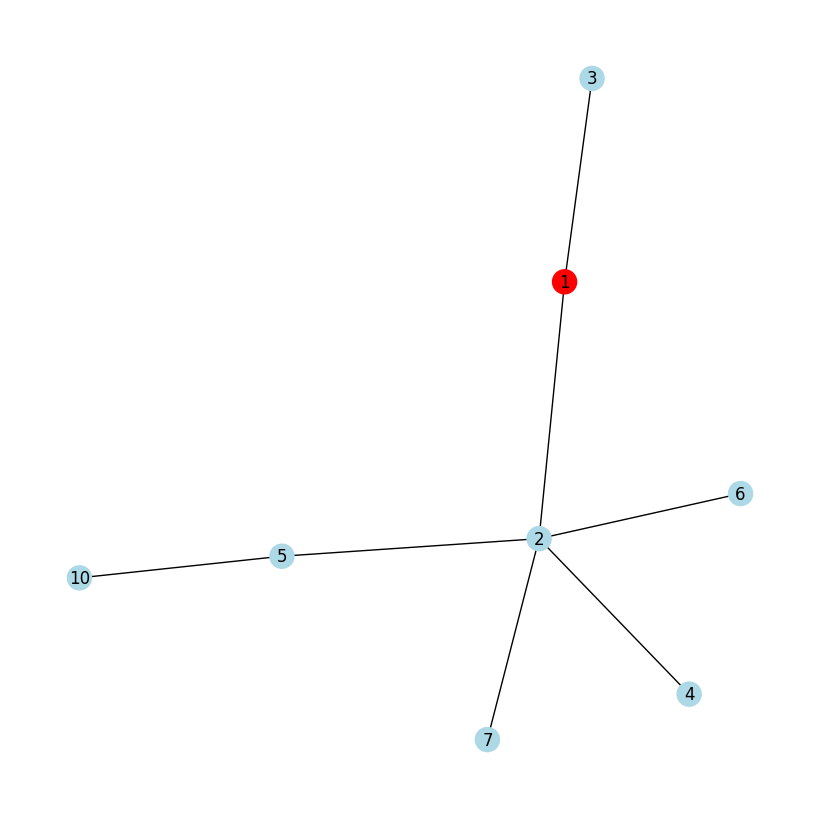

In [118]:
colors = ['red' if node == id_source_vertex else 'lightblue' for node in tree.nodes()]
nx.draw(tree, with_labels=True, node_color=colors)

In [135]:
id_source_vertex = 3
mapping, weight_dict = shortest_b_tree(H, id_source_vertex)

tree = nx.Graph()

for vertex_id in mapping.keys():
    hyperedge_id = mapping[vertex_id]
    if hyperedge_id is None:
        continue

    tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)

    weight_tail_nodes = [weight_dict[vertex_id] for vertex_id in tail_vertex_id_list]

    node_id_maximal_weight = tail_vertex_id_list[weight_tail_nodes.index(max(weight_tail_nodes))]

    tree.add_edge(node_id_maximal_weight, vertex_id)

# colors = ['red' if node == id_source_vertex else 'lightblue' for node in tree.nodes()]
# nx.draw(tree, with_labels=True, node_color=colors)

In [176]:
def calculate_tree(id_source_vertex: int):
    """
    Calculates the tree that we want to input in the HLD PathGES algorithm.
    Parameters:
        id_source_vertex (int): The id of the source vertex.
    """

    # Runs the SBT algorithm for vertex "id_source_vertex" as source.
    mapping, weight_dict = shortest_b_tree(H, id_source_vertex)
    # mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
    # weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.

    # Tree that we will input in the HLD PathGES algorithm.
    tree = nx.DiGraph()
    for vertex_id in mapping.keys():
        hyperedge_id = mapping[vertex_id]
        if hyperedge_id is None:
            continue

        tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)
        weight_tail_nodes = [weight_dict[vertex_id] for vertex_id in tail_vertex_id_list]
        node_id_maximal_weight = tail_vertex_id_list[weight_tail_nodes.index(max(weight_tail_nodes))]

        tree.add_edge(node_id_maximal_weight, vertex_id)

    return tree

def draw_tree(tree, id_source_vertex):
    colors = ['red' if node == id_source_vertex else 'lightblue' for node in tree.nodes()]
    nx.draw(tree, with_labels=True, node_color=colors)

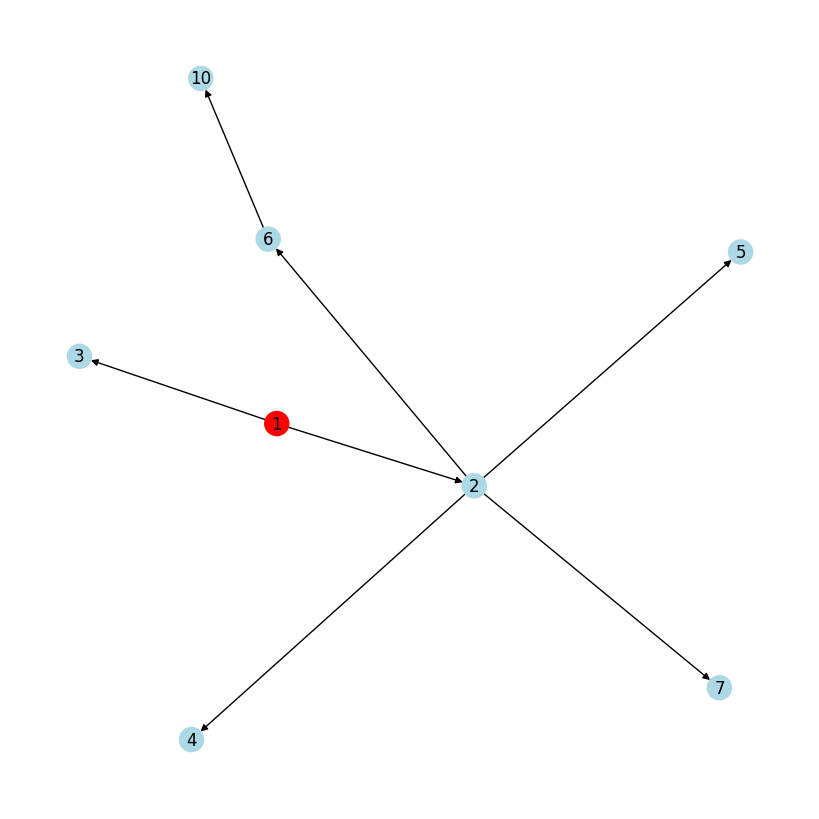

In [178]:
id_source_vertex = 1
tree = calculate_tree(id_source_vertex)
draw_tree(tree, id_source_vertex)